# Project: Predicting Credit Card Customer Attrition (Churn)

# Author: Robert Zacchigna

# Table of Contents

* [Problem Statement](#Problem_Statement)
* [Dataset - Credit Card Customer Churn](#Dataset)
    * [Download Location](#Download_Location)
    * [Columns](#Columns)
* [Imports](#Imports)


* **[Part 1: Exploratory Data Analysis](#Part_1)**
    * [Step 1: Loading the Dataset](#Part_1-Step_1)
    * [Step 2: Display the Dimensions, Head and Description of the Data](#Part_1-Step_2)
    * [Step 3: Show Proportions of Categorical Variables](#Part_1-Step_3)
    * [Step 4: Show Distributions of Numerical Variables](#Part_1-Step_4)


* **[Part 2: Data Preprocessing and Feature Reduction](#Part_2)**
    * [Step 1: Encode Categorical Variables, Remove Missing Data and Drop Unneeded Columns](#Part_2-Step_1)
    * [Step 2: Up-sample the Dataset Using SMOTE](#Part_2-Step_2)
    * [Step 3: Use PCA Feature Reduction to Reduce the Number of Encoded Features in the Dataset](#Part_2-Step_3)
    
    
* **[Part 3: Model Evaluation and Selection](#Part_3)**
    * [Step 1: Split Dataset into Train and Test Sets](#Part_3-Step_1)
    * [Step 2: Conduct Logistic Regression Modeling](#Part_3-Step_2)
    * [Step 3: Conduct XG Boost Classifier Modeling](#Part_3-Step_3)
    * [Step 4: Conduct Decision Tree Classification Modeling](#Part_3-Step_4)
    * [Step 5: Conduct Random Forest Classification Modeling](#Part_3-Step_5)
    * [Step 6: Compare the Recall Scores of Each of the Models](#Part_3-Step_6)


* **[Part 4: Final Model and Analysis Results](#Part_4)**
    * [Step 1: Construct the Final Model - XG Boost Classifier](#Part_4-Step_1)
    * [Step 2: Use the XG Boost Classifier Model to Predict Customer Attrition on the Test Dataset](#Part_4-Step_2)
    * [Step 3: Use the XG Boost Classifier Model to Predict Customer Attrition on the Original Dataset (No Up-Sampling)](#Part_4-Step_3)
    * [Step 4: Final Results Using XG Boost Classifier](#Part_4-Step_4)
    * [Step 5: Analysis and Results Conclusion](#Part_4-Step_5)

<a id='Problem_Statement'></a>
## Problem Statement

Customer churning (or customer attrition rate) is a problem for any business in the service industry, you only make money by keeping customers interested in your product. In the financial service industry this usually takes the form of credit cards and so the more people that use their credit card service, the more money they will make. Being able to determine which customers are the most likely to drop their credit card and by extension, be able to reach out to those customers before they drop the card to fix their problem. This could give the bank a competitive advantage in the marketplace by keeping more customers using their credit card over their competitors.

<a id='Dataset'></a>
## Dataset - Credit Card Customer Churn

<ins>Download Location:</ins> https://www.kaggle.com/sakshigoyal7/credit-card-customers <a id='Download_Location'></a>

<ins>Columns:<ins> <a id='Columns'></a>
* __ClientNum__ - Unique identifier for the customer holding the account
* __Attrition_Flag__ - Whether or not the customers account has been closed
* __Customer_Age__ - Age of the customer in years
* __Gender__ - Gender of the customer (M or F)
* __Dependent_count__ - Number of dependents of the customer
* __Education_Level__ - Education level of the customer
* __Marital_Status__ - Marriage status of the customer
* __Income_Category__ - Annual income of the customer
* __Card_Category__ - Type of Card held by the customer (Blue, Silver, Gold, Platinum)
* __Months_on_book__ - Number of months the customer has been with the bank
* __Total_Relationship_Count__ - Number of bank products owned by the customer
* __Months_Inactive_12_mon__ - Number of months on inactivity by the customer in the last 2 months
* __Contacts_Count_12_mon__ - Number of contacts by the customer in the last 12 months
* __Credit_Limit__ - Credit card limit of the customer
* __Total_Revolving_Bal__ - Total Revolving Balance on the customer's Credit Card
* __Avg_Open_To_Buy__ - Open to Buy Credit Line of the customer (Average of last 12 months)
* __Total_Amt_Chng_Q4_Q1__ - Change in Transaction Amount of the customer (Q4 over Q1)
* __Total_Trans_Amt__ - Total Transaction Amount of the customer (Last 12 months)
* __Total_Trans_Ct__ - Total Transaction Count of the customer (Last 12 months)
* __Total_Ct_Chng_Q4_Q1__ - Change in Transaction Count of the customer (Q4 over Q1) 
* __Avg_Utilization_Ratio__ - Average customer Card Utilization Ratio

<a id='Imports'></a>
## Imports

In [147]:
import numpy as np
import pandas as pd
import seaborn as sb
import scikitplot as skplt

# imblearn Libraries
from imblearn.over_sampling import SMOTE
from imblearn import __version__ as imbv

# scipy Libraries
from scipy.stats import norm
from scipy import __version__ as scipv

# matplotlib Libraries
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv

# plotly Libraries
import plotly.express as ex
from plotly import __version__ as pvm

# sklearn Libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import __version__ as skv
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, recall_score, confusion_matrix

# Library Versions
print('Using version %s of scipy' % scipv)
print('Using version %s of pandas' % pd.__version__)
print('Using version %s of numpy' % np.__version__)
print('Using version %s of plotly' % pvm)
print('Using version %s of imblearn' % imbv)
print('Using version %s of sklearn' % skv)
print('Using version %s of seaborn' % sb.__version__)
print('Using version %s of matplotlib' % mpv)

Using version 1.4.1 of scipy
Using version 1.1.2 of pandas
Using version 1.18.4 of numpy
Using version 4.14.1 of plotly
Using version 0.7.0 of imblearn
Using version 0.23.2 of sklearn
Using version 0.10.1 of seaborn
Using version 3.2.1 of matplotlib


<a id='Part_1'></a>
# Part 1: Exploratory Data Analysis

<a id='Part_1-Step_1'></a>
## Step 1: Loading the Dataset

In [2]:
bankData = pd.read_csv('BankChurners.csv')

<a id='Part_1-Step_2'></a>
## Step 2: Display the Dimensions, Head and Description of the Data

In [3]:
print("The dimension of the data is: {:,} (rows) by {:,} (columns)".format(bankData.shape[0], bankData.shape[1]))

The dimension of the data is: 10,127 (rows) by 21 (columns)


In [4]:
bankData.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [5]:
bankData.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

<a id='Part_1-Step_3'></a>
## Step 3: Show Proportions of Categorical Variables

### Proportion of Customer Genders

In [6]:
ex.pie(bankData, names='Gender', title='Proportion of Customer Genders')

There are slightly more female than male customers but the difference is so small that it won't have a significant impact on the overall data analysis. For all intends and purposes we can say that the genders are uniformly distributed.

### Proportion of Education Levels

In [36]:
ex.pie(bankData, names='Education_Level', title='Proportion of Education Levels')

We can see that the largest amount of customers have at least a graduate level education, with the second highest being high school level.

### Proportion of Marital Status

In [38]:
ex.pie(bankData, names='Marital_Status', title='Proportion of Marital Status')

From the graph above, we can see that the majority of customers are either married or single.

### Proportion of Different Income Levels

In [158]:
income = ex.pie(bankData, names='Income_Category', title='Proportion of Different Income Levels')

newNames = {'$40K - $60K': '$40K - 60K', '$60K - $80K': '$60K - 80K', '$80K - $120K': '$80K - 120K'}

for item in newNames:
    for i, elem in enumerate(income.data[0].labels):
        if elem == item:
            income.data[0].labels[i] = newNames[item]
income

From the graph above, we can see that the majority of customers earn less than $40k a year.

### Proportion of Different Card Categories

In [40]:
ex.pie(bankData, names='Card_Category', title='Proportion of Different Card Categories')

From the graph above, we can see that an overwhelming majority of customers use the banks "Blue" card

### Proportion of Attrited vs Existing Customers

In [41]:
ex.pie(bankData, names='Attrition_Flag', title='Proportion of Attrited vs Existing Customers')

Since the majority of the customer data we have is of existing customers, i will be using SMOTE to upsample the attrited samples to match them with the regular customer sample size to balance out the skewed data and thus, also helping to improve the performance of the later selected models.

<a id='Part_1-Step_4'></a>
## Step 4: Show Distributions of Numerical Variables

### Histograms: 
* Customer Age
* Dependent Count
* Months on Book
* Total Relationship Count
* Months Inactive (12 Months)
* Credit Limit 
* Total Transaction Amount
* Average Utilization Ratio

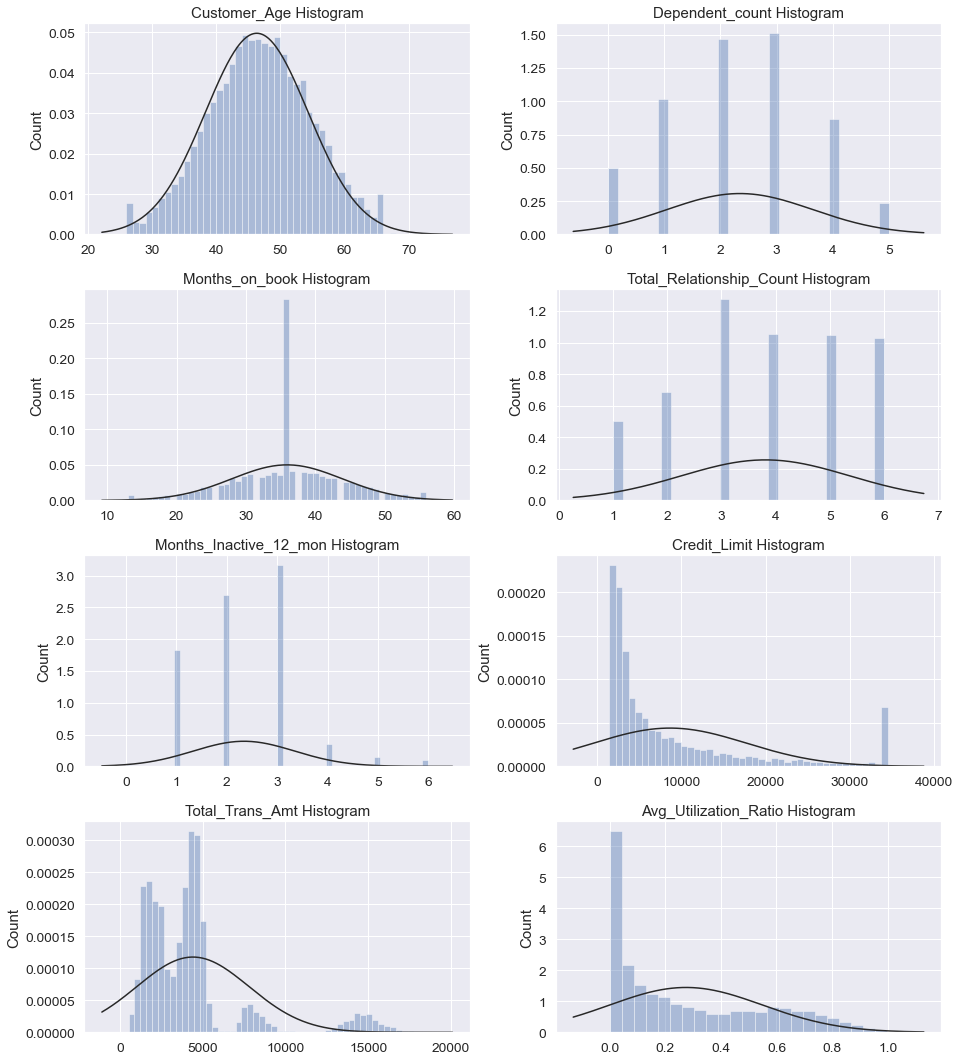

In [12]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 15)
sb.set(font_scale = 1.25)

hists = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

i = 1
for var in hists:
    fig.add_subplot(4, 2, i)
    sb.distplot(pd.Series(bankData[var], name=''),
                fit=norm, kde=False).set_title(var + " Histogram")
    plt.ylabel('Count')
    i += 1

fig.tight_layout()

### Box Plots:
* Customer Age
* Dependent Count
* Months on Book
* Total Relationship Count
* Months Inactive (12 Months)
* Credit Limit 
* Total Transaction Amount
* Average Utilization Ratio

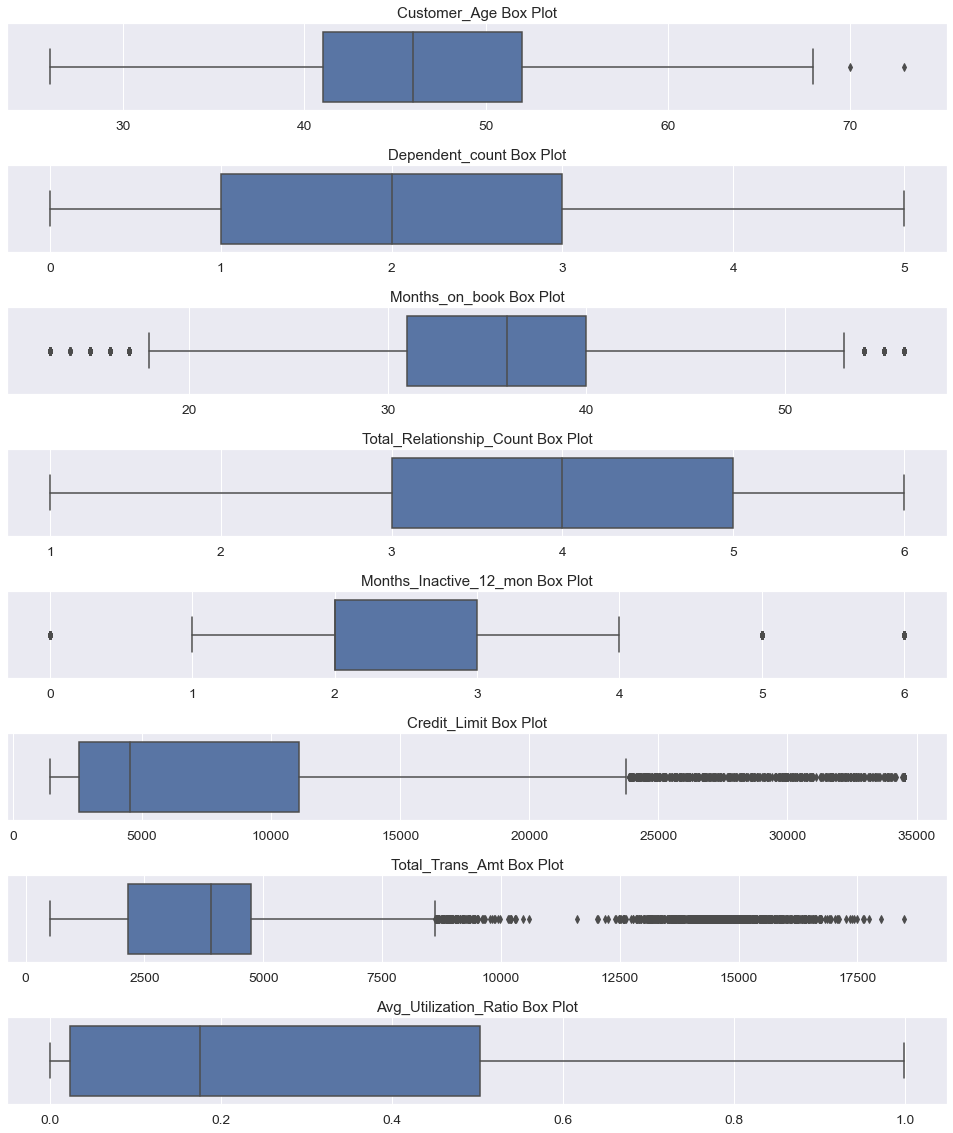

In [171]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 16)
sb.set(font_scale = 1.25)

boxs = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

i = 1
for var in boxs:
    fig.add_subplot(8, 1, i)
    sb.boxplot(pd.Series(bankData[var], name='')).set_title(var + " Box Plot")
    i += 1

fig.tight_layout()

<a id='Part_2'></a>
# Part 2: Data Preprocessing and Feature Reduction

<a id='Part_2-Step_1'></a>
## Step 1: Encode Categorical Variables, Remove Missing Data and Drop Unneeded Columns

### Get Dummies of categorical variables and concat them to the main dataframe (along with dropping missing values)

In [7]:
bankData['Attrition_Flag'] = bankData['Attrition_Flag'].replace({'Attrited Customer':1, 'Existing Customer':0})
bankData['Gender'] = bankData['Gender'].replace({'F':1, 'M':0})

bankData = pd.concat([bankData, pd.get_dummies(bankData['Education_Level']).drop(columns=['Unknown'])], axis=1)
bankData = pd.concat([bankData, pd.get_dummies(bankData['Income_Category']).drop(columns=['Unknown'])], axis=1)
bankData = pd.concat([bankData, pd.get_dummies(bankData['Marital_Status']).drop(columns=['Unknown'])], axis=1)
bankData = pd.concat([bankData, pd.get_dummies(bankData['Card_Category']).drop(columns=['Platinum'])], axis=1)

### Drop Unneeded Columns from Dataset

In [8]:
bankData.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category', 'CLIENTNUM'], inplace=True)

### New Dataset Dimensions

In [9]:
print("The dimension of the data is: {:,} (rows) by {:,} (columns)".format(bankData.shape[0], bankData.shape[1]))

The dimension of the data is: 10,127 (rows) by 33 (columns)


In [10]:
bankData.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0               0            45       0                3              39   
1               0            49       1                5              44   
2               0            51       0                3              36   
3               0            40       1                4              34   
4               0            40       0                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  ...  $40K - $60K  $60K - $80K  \
0       12691.0                  777  ...            0            1   
1        8256.0                  864  ...            0            0   
2        3418.0                    0  ...            0            0   
3        3313.0                 2517  ...            0            0   
4        4716.0                    0  ...            0            1   

   $80K - $120K  Less than $40K  Divorced  Married  Single  Blue  Gold  Silver  
0             0               0         0        1       0     1     0       0  
1             0               1         0        0       1     1     0       0  
2             1               0         0        1       0     1     0       0  
3             0               1         0        0       0     1     0       0  
4             0               0         0        1       0     1     0       0  

[5 rows x 33 columns]

### Annotated Correlation Matrix of all Features of the Dataset

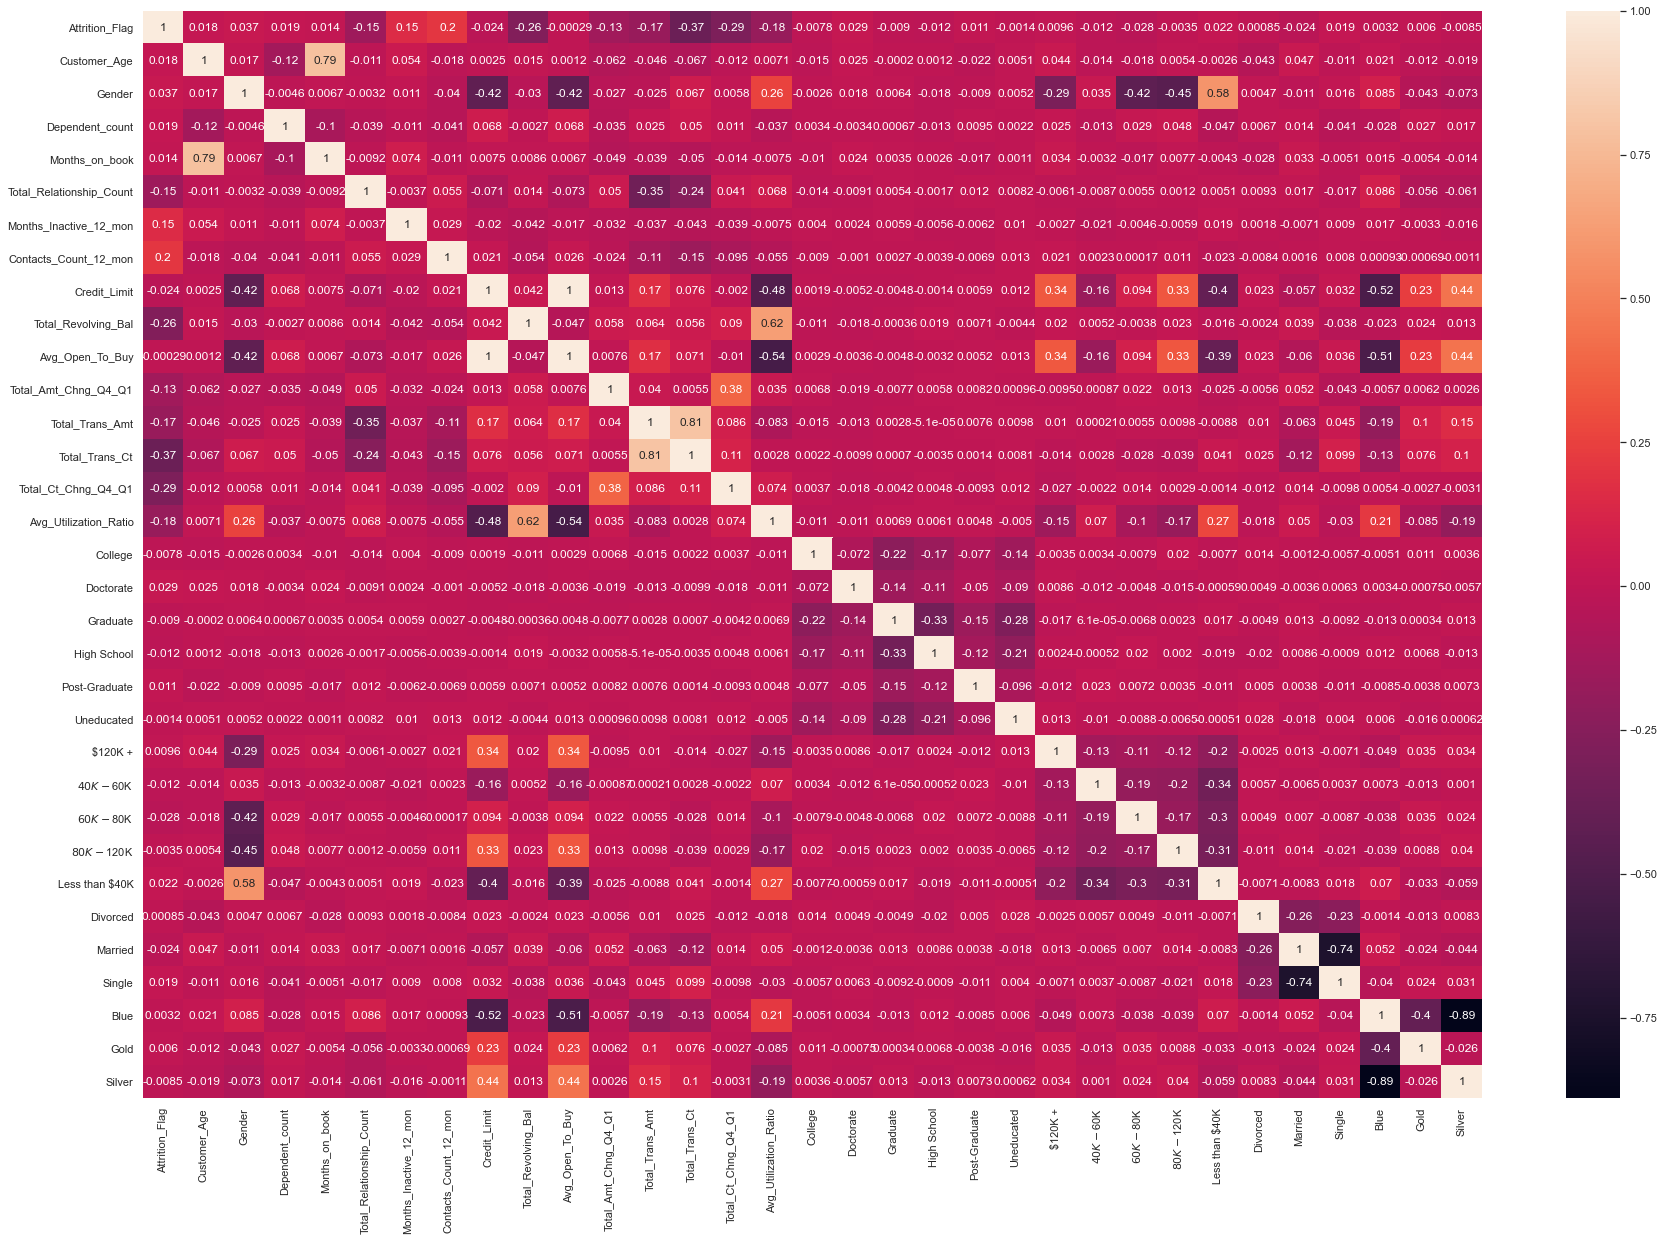

In [183]:
fig = plt.figure()
fig.set_size_inches(30, 20)
sb.set(font_scale = 1)

sb.heatmap(bankData.corr('pearson'), annot=True)

From the above correlation matrix, we can see that there are now quite a few variables and using all of them for modeling could pose to be a problem. I will first up-sample the data to even out the skewedness of the attrited customers and then use PCA to reduce the number of encoded features in the dataset.

<a id='Part_2-Step_2'></a>
## Step 2: Up-sample the Dataset Using SMOTE

In [115]:
smote_sample = SMOTE()

X, y = smote_sample.fit_resample(bankData[bankData.columns[1:]], bankData[bankData.columns[0]])

up_sampData = X.assign(Attrition = y)

<a id='Part_2-Step_3'></a>
## Step 3: Use PCA Feature Reduction to Reduce the Number of Encoded Features in the Dataset

### Split Encoded Columns from the Main Dataframe

In [116]:
encoded_cols = up_sampData[up_sampData.columns[15:-1]]

up_sampData = up_sampData.drop(columns=up_sampData.columns[15:-1])

### Using PCA (Principal Component Analysis) to Reduce the Number of Encoded Variables in the Dataset

Using principal component analysis to reduce the dimensionality of the encoded categorical variables will lose some of the variances in the data but as a result of this, using only a few of the principal components instead of all the encoded features will help to construct a better model.

Text(0, 0.5, 'Explained Variance')

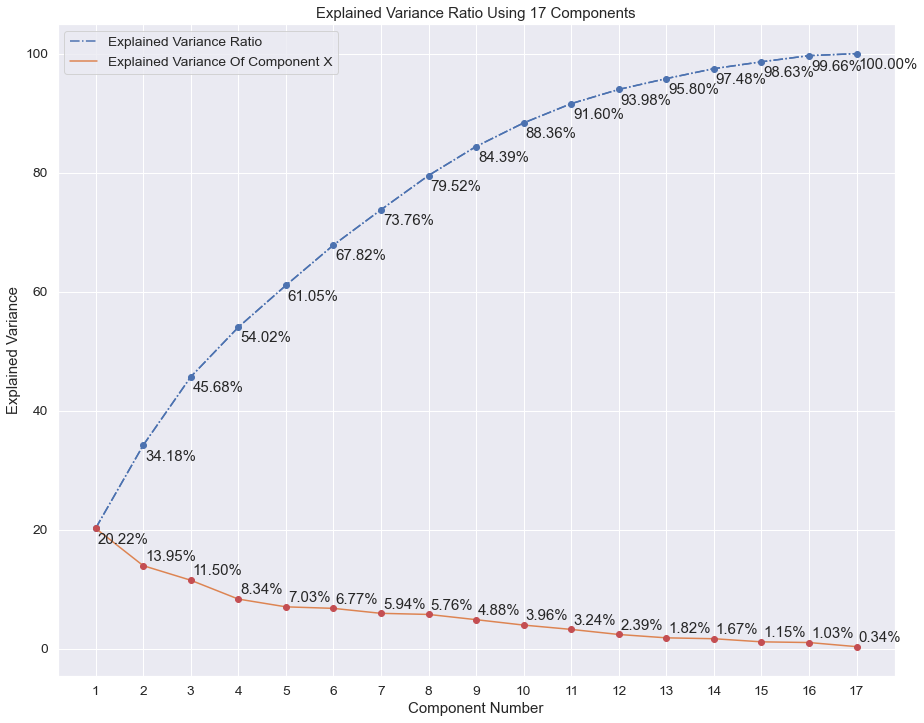

In [118]:
fig = plt.figure()
fig.set_size_inches(15, 12)
sb.set(font_scale = 1.25)

N_COMPONENTS = len(encoded_cols.columns)

pca = PCA(n_components = N_COMPONENTS)

pc_matrix = pca.fit_transform(encoded_cols)

evr = pca.explained_variance_ratio_ * 100
cumsum_evr = np.cumsum(evr)

ax = sb.lineplot(x=np.arange(1, len(cumsum_evr) + 1), y=cumsum_evr, label='Explained Variance Ratio')
ax.lines[0].set_linestyle('-.')
ax.set_title('Explained Variance Ratio Using {} Components'.format(N_COMPONENTS))
ax.plot(np.arange(1, len(cumsum_evr) + 1), cumsum_evr, 'bo')

for x, y in zip(range(1, len(cumsum_evr) + 1), cumsum_evr):
    plt.annotate("{:.2f}%".format(y), (x, y), xytext=(2, -15), 
                 textcoords="offset points", annotation_clip = False)

ax = sb.lineplot(x=np.arange(1, len(cumsum_evr) + 1), y=evr, label='Explained Variance Of Component X')
ax.plot(np.arange(1, len(evr) + 1), evr,'ro')
ax.lines[1].set_linestyle('-.')
ax.set_xticks([i for i in range(1, len(cumsum_evr) + 1)])

for x, y in zip(range(1, len(cumsum_evr) + 1), evr):
    if x != 1:
        plt.annotate("{:.2f}%".format(y), (x, y), xytext=(2, 5), 
                     textcoords="offset points", annotation_clip = False)

ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')

The graph above shows the explained variance of each PCA component, along with the cumulative sum of the components above. Looking at the values above, i will be using 8 of the 17 PCA components because it reduces the total number of enocded features by over half, while still explaining roughly 80% of the encoded data.

### Add Specified PCA Components to the Up-Sampled Dataframe

In [14]:
up_sampData_PCA = pd.concat([up_sampData, 
                             pd.DataFrame(pc_matrix, columns=['PC-{}'.format(i) for i in range(1, N_COMPONENTS + 1)])], axis=1)

up_sampData_PCA = up_sampData_PCA[up_sampData_PCA.columns[:24]]

up_sampData_PCA.head()

Customer_Age  Gender  Dependent_count  Months_on_book  \
0            45       0                3              39   
1            49       1                5              44   
2            51       0                3              36   
3            40       1                4              34   
4            40       0                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   Avg_Utilization_Ratio  Attrition      PC-1      PC-2      PC-3      PC-4  \
0                  0.061          0 -0.699888 -0.376411 -0.341886  0.711851   
1                  0.105          0  0.720710  0.902462  0.664862  0.141976   
2                  0.000          0 -0.723886 -0.185445  0.868676  0.098381   
3                  0.760          0  0.061924  0.605905 -0.654422  0.160395   
4                  0.000          0 -0.681031 -0.339876 -0.181033  0.107592   

       PC-5      PC-6      PC-7      PC-8  
0  0.352589 -0.403314  0.770307 -0.148494  
1  0.037251 -0.016019 -0.008384 -0.058194  
2  0.602805  0.206688 -0.506404 -0.245912  
3  0.183134 -0.731404 -0.107596  0.024946  
4 -0.069483  0.724088  0.859428 -0.220750  

[5 rows x 24 columns]

### Annotated Correlation Matrix of Up-Sampled Data with PCA Components

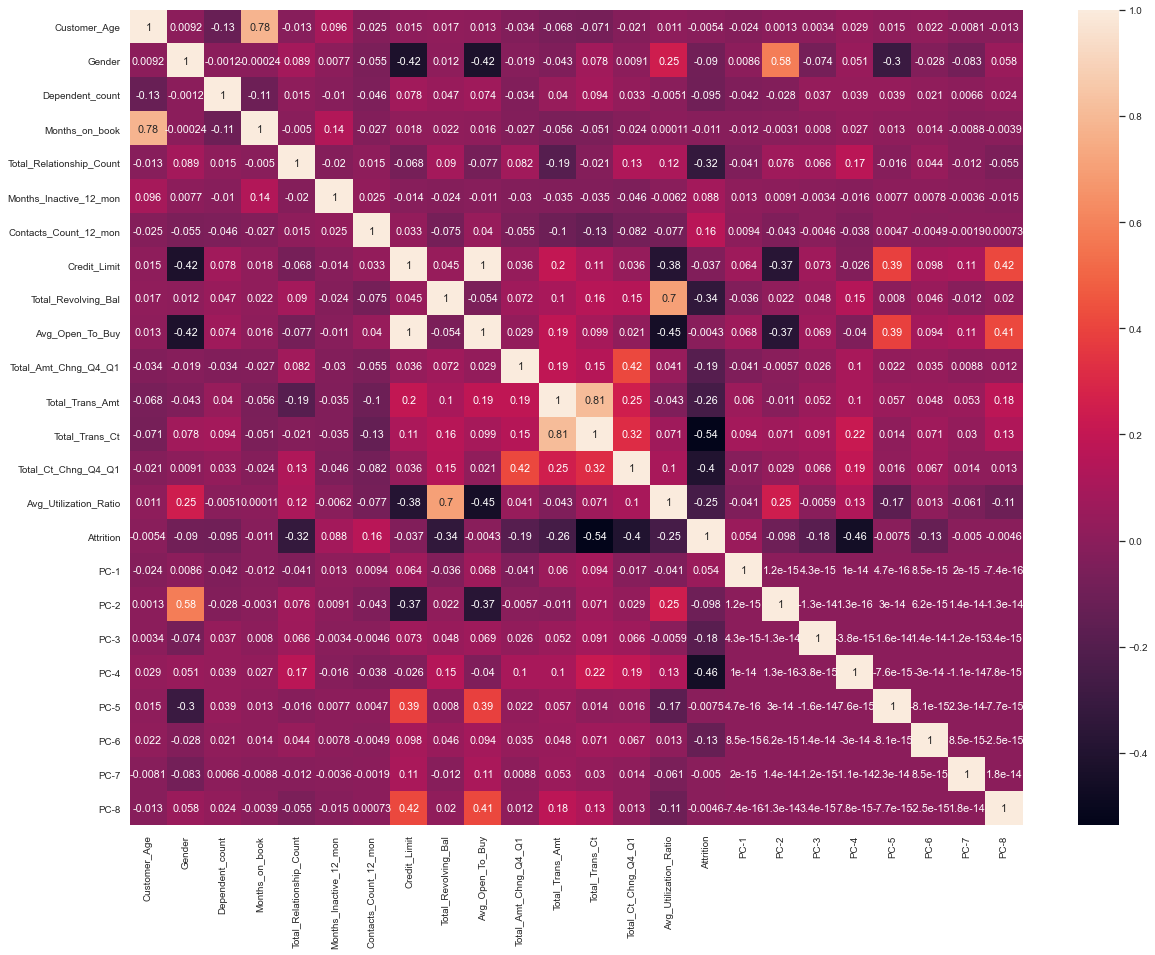

In [353]:
fig = plt.figure()
fig.set_size_inches(20, 15)
sb.set(font_scale = 0.9)

sb.heatmap(up_sampData_PCA.corr('pearson'), annot=True)

<a id='Part_3'></a>
# Part 3: Model Evaluation and Selection

The models I have selected to experiment with in this analysis are the following: Logistic Regression, XGB Classifier, Decision Tree Classifier, and Random Forest Classifier. The models performances (Recall Score) with the training data will be compared at the end to see which model performed the best and then the best model will be used as the final model for predicting on the test set.

<a id='Part_3-Step_1'></a>
## Step 1: Split Dataset into Train and Test Sets

In [15]:
seed = 74 # Seed for train/test split reproduction

x_train, x_test, y_train, y_test = train_test_split(up_sampData_PCA[up_sampData_PCA.columns.drop('Attrition')],
                                                    up_sampData_PCA['Attrition'],
                                                    train_size=0.65,
                                                    random_state=seed)

In [16]:
x_train.head()

Customer_Age  Gender  Dependent_count  Months_on_book  \
12310            41       0                3              22   
7553             46       0                1              28   
4010             48       0                3              35   
6232             52       0                3              36   
7944             41       1                1              31   

       Total_Relationship_Count  Months_Inactive_12_mon  \
12310                         2                       3   
7553                          4                       3   
4010                          3                       1   
6232                          2                       3   
7944                          2                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
12310                      4  20552.682219                   38   
7553                       3   9880.000000                 1792   
4010                       3   2592.000000                    0   
6232                       3   3022.000000                  895   
7944                       2   2909.000000                 1201   

       Avg_Open_To_Buy  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
12310     20514.081867  ...             0.619498               0.001842   
7553       8088.000000  ...             0.951000               0.181000   
4010       2592.000000  ...             0.771000               0.000000   
6232       2127.000000  ...             0.900000               0.296000   
7944       1708.000000  ...             0.659000               0.413000   

           PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
12310  0.038903 -0.451579 -0.112430 -0.408870  0.516683  0.051233 -0.571704   
7553  -0.691872 -0.310968 -0.389838  0.618428  0.240671 -0.397017  0.102238   
4010  -0.687156 -0.429964 -0.042411  0.288510 -0.782033  0.144204 -0.266821   
6232  -0.697932 -0.389641 -0.053706  0.073855  0.511609  0.405355 -0.502384   
7944  -0.655720  0.703306 -0.413402  0.034177 -0.231537  0.717537  0.043588   

           PC-8  
12310 -0.264407  
7553  -0.018238  
4010   0.115012  
6232  -0.230552  
7944  -0.011712  

[5 rows x 23 columns]

In [17]:
y_train.head()

12310    1
7553     0
4010     0
6232     1
7944     0
Name: Attrition, dtype: int64

<a id='Part_3-Step_2'></a>
## Step 2: Conduct Logistic Regression Modeling

### Create pipeline for scaling and running logistic regression on the data

In [376]:
lr_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(random_state=seed))
]))

### Setup parameters for the logistic regression model to be tested by GridSearchCV

In [384]:
param_grid = {'lr__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'lr__fit_intercept': [True, False],
              'lr__class_weight': ['balanced', None],
              'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'lr__max_iter': np.arange(100, 600, 100),
              'lr__warm_start': [True, False]}

lr_grid = GridSearchCV(lr_pipe, scoring=make_scorer(recall_score), 
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the logistic regression grid to find the best parameters for the logistic regression model

In [385]:
lr_grid.fit(x_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 477 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 1498 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2252 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3089 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  3.3min finished
c:\users\digital storm\pycharmprojects\venv\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(random_state=74))]),
             n_jobs=-1,
             param_grid={'lr__class_weight': ['balanced', None],
                         'lr__fit_intercept': [True, False],
                         'lr__max_iter': array([100, 200, 300, 400, 500]),
                         'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                        'sag', 'saga'],
                         'lr__warm_start': [True, False]},
             scoring=make_scorer(recall_score), verbose=2)

### Display top recall scores found by the GridSearchCV

In [386]:
lr_df = pd.DataFrame(lr_grid.cv_results_).sort_values('mean_test_score', 
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
lr_df

params  mean_test_score
31   {'lr__class_weight': 'balanced', 'lr__fit_inte...         0.900869
30   {'lr__class_weight': 'balanced', 'lr__fit_inte...         0.900869
431  {'lr__class_weight': None, 'lr__fit_intercept'...         0.900688
430  {'lr__class_weight': None, 'lr__fit_intercept'...         0.900688
550  {'lr__class_weight': None, 'lr__fit_intercept'...         0.899784
591  {'lr__class_weight': None, 'lr__fit_intercept'...         0.899784
551  {'lr__class_weight': None, 'lr__fit_intercept'...         0.899784
590  {'lr__class_weight': None, 'lr__fit_intercept'...         0.899784
470  {'lr__class_weight': None, 'lr__fit_intercept'...         0.899784
511  {'lr__class_weight': None, 'lr__fit_intercept'...         0.899784

### Based off the dataframe above, display the best params and score for the logistic regression model

In [393]:
print('Best Logistic Regression Parameters\n' + '='*35)

for name, val in lr_df.iloc[0]['params'].items():
    print('{:>19}: {}'.format(name.replace('lr__', ''), val))
    
lr_recall = lr_df.iloc[0]['mean_test_score']
print('\nRecall Score: {}'.format(round(lr_recall, 4)))

Best Logistic Regression Parameters
       class_weight: balanced
      fit_intercept: True
           max_iter: 100
            penalty: none
             solver: newton-cg
         warm_start: False

Recall Score: 0.9009


<a id='Part_3-Step_3'></a>
## Step 3: Conduct XG Boost Classifier Modeling

### Create pipeline for scaling and running XG Boost Classifier on the data

In [71]:
xg_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('xg', XGBClassifier(random_state=seed))
]))

### Setup parameters for the XG Boost Classifier model to be tested by GridSearchCV

In [72]:
param_grid = {'xg__use_label_encoder': [False],
              "xg__learning_rate": [0.05, 0.1, 0.2],
              'xg__eval_metric': ['logloss'],
              'xg__booster': ['gbtree', 'gblinear'],
              'xg__importance_type': ['gain', 'weight'],
              "xg__subsample": [0.8, 0.9, 1],
              "xg__colsample_bytree": [0.8, 0.9, 1],
              "xg__max_depth": [5, 6],
              "xg__reg_lambda": [0.1, 0.2]}

xg_grid = GridSearchCV(xg_pipe, scoring=make_scorer(recall_score), 
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the XG Boost Classifier grid to find the best parameters for the XG Boost Classifier model

In [73]:
xg_grid.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 10.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                    

### Display top recall scores found by the GridSearchCV

In [74]:
xg_df = pd.DataFrame(xg_grid.cv_results_).sort_values('mean_test_score', 
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
xg_df

params  mean_test_score
69   {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982995
33   {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982995
106  {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982994
213  {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982994
98   {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982994
134  {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982994
142  {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982994
177  {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982994
62   {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982814
26   {'xg__booster': 'gbtree', 'xg__colsample_bytre...         0.982814

### Based off the dataframe above, display the best params and score for the XG Boost Classifier model

In [77]:
print('Best XG Boost Classifier Parameters\n' + '='*35)

for name, val in xg_df.iloc[0]['params'].items():
    print('{:>19}: {}'.format(name.replace('xg__', ''), val))
    
xg_recall = xg_df.iloc[0]['mean_test_score']
print('\nRecall Score: {}'.format(round(xg_recall, 4)))

Best XG Boost Classifier Parameters
            xg__booster: gbtree
   xg__colsample_bytree: 0.8
        xg__eval_metric: logloss
    xg__importance_type: weight
      xg__learning_rate: 0.2
          xg__max_depth: 6
         xg__reg_lambda: 0.2
          xg__subsample: 0.8
  xg__use_label_encoder: False

Recall Score: 0.983


<a id='Part_3-Step_4'></a>
## Step 4: Conduct Decision Tree Classification Modeling

### Create pipeline for scaling and running decision tree classification on the data

In [78]:
dt_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=seed))
]))

### Setup parameters for the decision tree classification model to be tested by GridSearchCV

In [86]:
param_grid = {'dt__criterion': ['gini', 'entropy'],
              'dt__class_weight': ['balanced', None],
              'dt__splitter': ['best', 'random'],
              'dt__max_features': ['auto', 'sqrt', 'log2'],
              'dt__max_depth': [2, 4, 6],
              'dt__min_samples_leaf': [1, 2, 4],
              'dt__min_samples_split': [1, 2, 4]}

dt_grid = GridSearchCV(dt_pipe, scoring=make_scorer(recall_score), 
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the decision tree classification grid to find the best parameters for the decision tree classification model

In [87]:
dt_grid.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1938 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 2828 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   32.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=74))]),
             n_jobs=-1,
             param_grid={'dt__class_weight': ['balanced', None],
                         'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 4, 6],
                         'dt__max_features': ['auto', 'sqrt', 'log2'],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [1, 2, 4],
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(recall_score), verbose=2)

### Display top recall scores found by the GridSearchCV

In [88]:
dt_df = pd.DataFrame(dt_grid.cv_results_).sort_values('mean_test_score', 
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
dt_df

params  mean_test_score
166  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
214  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
170  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
172  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
176  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
178  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
182  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
184  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
188  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374
164  {'dt__class_weight': 'balanced', 'dt__criterio...         0.926374

### Based off the dataframe above, display the best params and score for the decision tree classification model

In [89]:
print('Best Decision Tree Classification Parameters\n' + '='*44)

for name, val in dt_df.iloc[0]['params'].items():
    print('{:>23}: {}'.format(name.replace('dt__', ''), val))
    
dt_recall = dt_df.iloc[0]['mean_test_score']
print('\nRecall Score: {}'.format(round(dt_recall, 4)))

Best Decision Tree Classification Parameters
           dt__class_weight: balanced
              dt__criterion: entropy
              dt__max_depth: 2
           dt__max_features: auto
       dt__min_samples_leaf: 1
      dt__min_samples_split: 4
               dt__splitter: best

Recall Score: 0.9264


<a id='Part_3-Step_5'></a>
## Step 5: Conduct Random Forest Classification Modeling

### Create pipeline for scaling and running random forest classification modeling on the data

In [54]:
rf_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=seed))
]))

### Setup parameters for the random forest classification model to be tested by GridSearchCV

In [58]:
param_grid = {'rf__max_depth': [2, 4, 6],
              'rf__class_weight': ['balanced', 'balanced_subsample'],
              'rf__criterion': ['gini', 'entropy'],
              'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__min_samples_leaf': [1, 2, 4],
              'rf__min_samples_split': [2, 5, 7],
              'rf__n_estimators': np.arange(100, 400, 100)}

rf_grid = GridSearchCV(rf_pipe, scoring=make_scorer(recall_score), 
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the random forest classification grid to find the best parameters for the random forest classification model

In [59]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 38.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=74))]),
             n_jobs=-1,
             param_grid={'rf__class_weight': ['balanced', 'balanced_subsample'],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [2, 4, 6],
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 7],
                         'rf__n_estimators': array([100, 200, 300])},
             scoring=make_scorer(recall_score), verbose=2)

### Display top recall scores found by the GridSearchCV

In [60]:
rf_df = pd.DataFrame(rf_grid.cv_results_).sort_values('mean_test_score', 
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
rf_df

params  mean_test_score
685  {'rf__class_weight': 'balanced_subsample', 'rf...         0.940485
712  {'rf__class_weight': 'balanced_subsample', 'rf...         0.940485
658  {'rf__class_weight': 'balanced_subsample', 'rf...         0.940485
179  {'rf__class_weight': 'balanced', 'rf__criterio...         0.940124
206  {'rf__class_weight': 'balanced', 'rf__criterio...         0.940124
233  {'rf__class_weight': 'balanced', 'rf__criterio...         0.940124
222  {'rf__class_weight': 'balanced', 'rf__criterio...         0.939943
195  {'rf__class_weight': 'balanced', 'rf__criterio...         0.939943
168  {'rf__class_weight': 'balanced', 'rf__criterio...         0.939943
232  {'rf__class_weight': 'balanced', 'rf__criterio...         0.939762

### Based off the dataframe above, display the best params and score for the random forest classification model

In [65]:
print('Best Random Forest Classification Parameters\n' + '='*44)

for name, val in rf_df.iloc[0]['params'].items():
    print('{:>19}: {}'.format(name.replace('rf__', ''), val))
    
rf_recall = rf_df.iloc[0]['mean_test_score']
print('\nRecall Score: {}'.format(round(rf_recall, 4)))

Best Random Forest Classification Parameters
       rf__class_weight: balanced_subsample
          rf__criterion: gini
          rf__max_depth: 6
       rf__max_features: sqrt
   rf__min_samples_leaf: 2
  rf__min_samples_split: 2
       rf__n_estimators: 200

Recall Score: 0.9405


<a id='Part_3-Step_6'></a>
## Step 6: Compare the Recall Scores of Each of the Models

### Dataframe of the recall values of all the models (sorted from largest to smallest)

In [90]:
recall_scores = [lr_recall, xg_recall, dt_recall, rf_recall]

modelTypes = ['Logistic Regression', 'XG Boost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']

recall_df = pd.DataFrame(zip(modelTypes, recall_scores), 
                         columns=['Model Type', 'Recall Score'])

recall_df = recall_df.nlargest(len(recall_df), 'Recall Score').reset_index(drop=True)

recall_df

Model Type  Recall Score
0       XG Boost Classifier      0.982995
1  Random Forest Classifier      0.940485
2  Decision Tree Classifier      0.926374
3       Logistic Regression      0.900900

From the above we can see that all of the models performed very well with the training data, with the best performing model being the XG Boost Classifier. As a result, the XG Boost Classifier will be the model that is used to make predictions using the test for the final analysis and results.

<a id='Part_4'></a>
# Part 4: Final Model and Analysis Results

<a id='Part_4-Step_1'></a>
## Step 1: Construct the Final Model - XG Boost Classifier

### Display Best parameters found by the GridSearchCV for the XG Boost Classifier model

In [104]:
print('Best XG Boost Classifier Parameters\n' + '='*35)

params = {}

for name, val in xg_df.iloc[0]['params'].items():
    name = name.replace('xg__', '')
    
    params.update({name: val})
    print('{:>21}: {}'.format(name, val))
    
xg_recall = xg_df.iloc[0]['mean_test_score']
print('\nRecall Score: {}'.format(round(xg_recall, 4)))

Best XG Boost Classifier Parameters
              booster: gbtree
     colsample_bytree: 0.8
          eval_metric: logloss
      importance_type: weight
        learning_rate: 0.2
            max_depth: 6
           reg_lambda: 0.2
            subsample: 0.8
    use_label_encoder: False

Recall Score: 0.983


### Create pipeline for scaling and running the best XG Boost Classifier model

In [101]:
best_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('xg', XGBClassifier(**params, random_state=seed))
]))

### Fit the model to all the training data

In [102]:
best_model = best_pipe.fit(x_train, y_train)

best_model

Pipeline(steps=[('scale', StandardScaler()),
                ('xg',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='weight',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=74,
                               reg_alpha=0, reg_lambda=0.2, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

<a id='Part_4-Step_2'></a>
## Step 2: Use the XG Boost Classifier Model to Predict Customer Attrition on the Test Dataset

In [105]:
y_pred = best_model.predict(x_test)

### Calculate the recall score for the train and best model (with test data) for comparison

In [111]:
best_model_score = recall_score(y_test, y_pred)

print("Best XG Boost Classifier score using the test data\n" + '='*50 +
      "\nTest Recall Score: {}\n\nTrain Recall Score: {}".format(round(best_model_score, 4),
                                                                 round(xg_recall, 4)))

print('\nDifference between train and best model test recall scores: {}'
      .format(abs(round(best_model_score - xg_recall, 4))))

Best XG Boost Classifier score using the test data
Test Recall Score: 0.9798

Train Recall Score: 0.983

Difference between train and best model test recall scores: 0.0032


Since the recall scores is so close to the value i received during my training experiments, i am confident the model i have selected will perform well with future, unseen, customer data.

<a id='Part_4-Step_3'></a>
## Step 3: Use the XG Boost Classifier Model to Predict Customer Attrition on the Original Dataset (No Up-Sampling)

In [144]:
encoded_cols = bankData[bankData.columns[16:]]
pc_matrix = pca.fit_transform(encoded_cols)

orginData_PCA = pd.concat([bankData[bankData.columns.drop(encoded_cols.columns)], 
                           pd.DataFrame(pc_matrix, columns=['PC-{}'.format(i) for i in range(1, N_COMPONENTS + 1)])], axis=1)

orginData_PCA = orginData_PCA[orginData_PCA.columns[:24]]

orginData_PCA_Pred = best_model.predict(orginData_PCA[orginData_PCA.columns[1:]])

print("Best XG Boost Classifier score using the Original Dataset\n" + '='*57 +
      "\nRecall Score: {}".format(round(recall_score(orginData_PCA['Attrition_Flag'], orginData_PCA_Pred), 4)))

Best XG Boost Classifier score using the Original Dataset
Recall Score: 0.9687


<a id='Part_4-Step_4'></a>
## Step 4: Final Results Using XG Boost Classifier

### Confusion Matrix of the Customer Attrition Predictions on Un-sampled Dataset

[Text(0, 0.5, 'Predicted Not Attrited'), Text(0, 1.5, ' Predicted Attrited')]

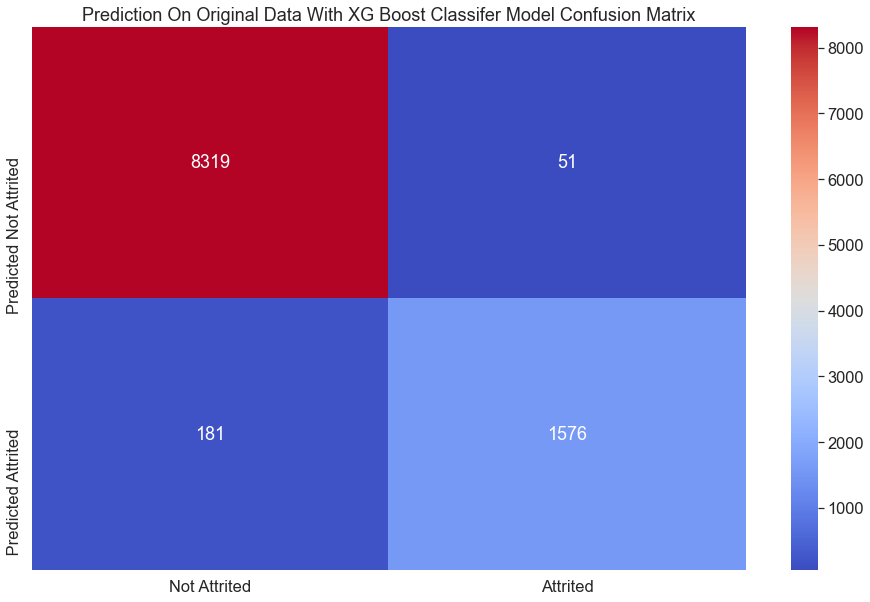

In [166]:
fig = plt.figure()
fig.set_size_inches(16, 10)
sb.set(font_scale = 1.5)

conf = sb.heatmap(confusion_matrix(orginData_PCA_Pred, orginData_PCA['Attrition_Flag']), 
                  annot=True, cmap='coolwarm', fmt='d')

conf.set_title('Prediction On Original Data With XG Boost Classifer Model Confusion Matrix')
conf.set_xticklabels(['Not Attrited', 'Attrited'])
conf.set_yticklabels(['Predicted Not Attrited',' Predicted Attrited'])

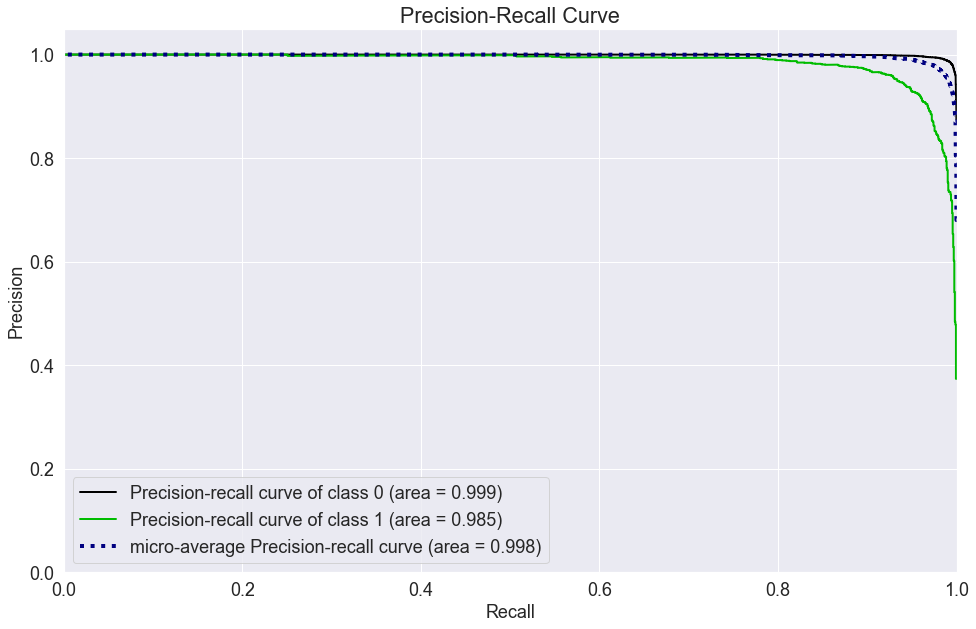

In [165]:
sb.set(font_scale = 1.5)

orginData_PCA_Proba = best_model.predict_proba(orginData_PCA[orginData_PCA.columns[1:]])
skplt.metrics.plot_precision_recall(orginData_PCA['Attrition_Flag'], orginData_PCA_Proba, figsize=[16, 10])

<a id='Part_4-Step_5'></a>
## Step 5: Analysis and Results Conclusion

From the above Confusion Matrix and Precision-Recall Curve graphs, it is evident that the XG Boost Classifier (with tuned hyperparameters) performed very well with the data and made some very good predictions using the test set and original dataset (without up-sampling). Due to all of the analysis and the final results, i am confident that this XG Boost Classifier model will perform well for bank for predicting customer attrition with their credit card.